In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, zero_one_loss, confusion_matrix
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
mnist = fetch_openml('mnist_784')

In [28]:
data = mnist.data
target = mnist.target
#division de la base en données d'apprentissage (70%) et de test
datatrain, datatest, targettrain, targettest = train_test_split(data, target,train_size=0.70)
print(datatrain.shape)
print(targettrain.shape)

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(49000, 784)
(49000,)


In [4]:
# SVM avec noyau linéaire
clsvm = SVC(kernel='linear')
clsvm.fit(datatrain,targettrain)
clsvm.score(datatest,targettest)

0.902

In [ ]:
precisions_kernel = []
rappel_kernel = []
temps_kernel = []
tt_kernel = []
erreur_kernel = []
train_precisions_kernel = []
for n in ["linear", "poly", "rbf", "sigmoid"]:
    clsvm = SVC(kernel=n)
    st = time.time()
    start_time = time.process_time()
    clsvm.fit(datatrain,targettrain)
    elapsed = time.process_time()-start_time
    duration = time.time()- st
    testpred = clsvm.predict(datatest)
    prec = clsvm.score(datatest,targettest)
    train_prec = clsvm.score(datatrain,targettrain)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    precisions_kernel.append(prec)
    train_precisions_kernel.append(train_prec)
    rappel_kernel.append(rap)
    temps_kernel.append(elapsed)
    tt_kernel.append(duration)
    erreur_kernel.append(err)
    print("precision =",prec,"precision apprentissage =",train_prec,"rappel =",rap,"erreur =",err,"temps =",elapsed, "time =",duration,"noyau =",n)
    cm = confusion_matrix(targettest,testpred)
    print(cm)

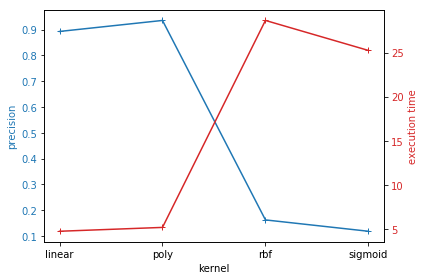

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('kernel')
ax1.set_ylabel('precision', color=color)
ax1.plot(["linear", "poly", "rbf", "sigmoid"],precisions_kernel,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot(["linear", "poly", "rbf", "sigmoid"],temps_kernel,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

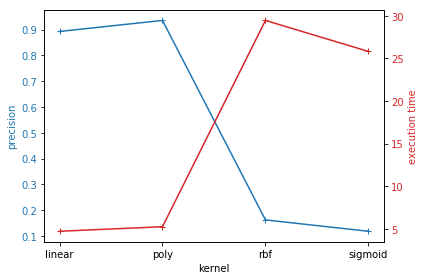

In [10]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('kernel')
ax1.set_ylabel('precision', color=color)
ax1.plot(["linear", "poly", "rbf", "sigmoid"],precisions_kernel,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot(["linear", "poly", "rbf", "sigmoid"],tt_kernel,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

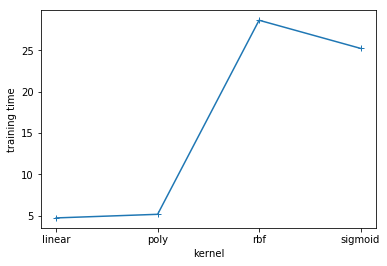

In [11]:
plt.plot(["linear", "poly", "rbf", "sigmoid"],temps_kernel,'+-')
plt.ylabel('training time')
plt.xlabel('kernel')
plt.show()

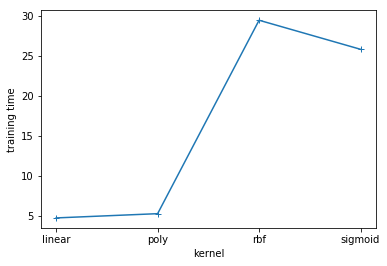

In [12]:
plt.plot(["linear", "poly", "rbf", "sigmoid"],tt_kernel,'+-')
plt.ylabel('training time')
plt.xlabel('kernel')
plt.show()

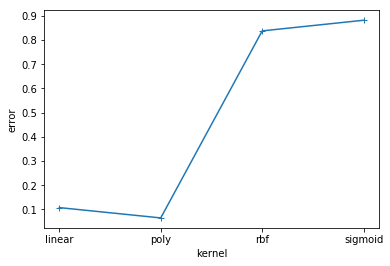

In [13]:
plt.plot(["linear", "poly", "rbf", "sigmoid"],erreur_kernel,'+-')
plt.ylabel('error')
plt.xlabel('kernel')
plt.show()

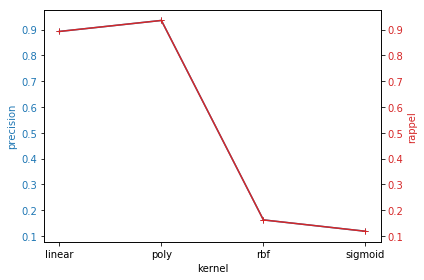

In [16]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('kernel')
ax1.set_ylabel('precision', color=color)
ax1.plot(["linear", "poly", "rbf", "sigmoid"],precisions_kernel,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('rappel', color=color)
ax2.plot(["linear", "poly", "rbf", "sigmoid"],rappel_kernel,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [19]:
precisions_c = []
rappel_c = []
temps_c = []
tt_c = []
erreur_c = []
train_precisions_c = []
train_erreur_c = []
for tol in [0.1, 0.3, 0.5, 0.7, 1]:
    clsvm = SVC(C=tol)
    st = time.time()
    start_time = time.process_time()
    clsvm.fit(datatrain,targettrain)
    elapsed = time.process_time()-start_time
    duration = time.time()-st
    testpred = clsvm.predict(datatest)
    trainpred = clsvm.predict(datatrain)
    prec = clsvm.score(datatest,targettest)
    train_prec = clsvm.score(datatrain,targettrain)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    train_err = zero_one_loss(targettrain,trainpred)
    precisions_c.append(prec)
    train_precisions_c.append(train_prec)
    rappel_c.append(rap)
    temps_c.append(elapsed)
    tt_c.append(duration)
    erreur_c.append(err)
    train_erreur_c.append(train_err)
    print("precision =",prec,"precision apprentissage =",train_prec,"rappel =",rap,"erreur =",err,"temps =",elapsed,"time =",duration,"tolérance aux erreurs =",tol)
    cm = confusion_matrix(targettest,testpred)
    print(cm)

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision = 0.118 precision apprentissage = 0.12314285714285714 rappel = 0.118 erreur = 0.882 temps = 29.40625 time = 30.458751678466797 tolérance aux erreurs = 0.1
[[  0 137   0   0   0   0   0   0   0   0]
 [  0 177   0   0   0   0   0   0   0   0]
 [  0 160   0   0   0   0   0   0   0   0]
 [  0 129   0   0   0   0   0   0   0   0]
 [  0 143   0   0   0   0   0   0   0   0]
 [  0 145   0   0   0   0   0   0   0   0]
 [  0 141   0   0   0   0   0   0   0   0]
 [  0 155   0   0   0   0   0   0   0   0]
 [  0 140   0   0   0   0   0   0   0   0]
 [  0 173   0   0   0   0   0   0   0   0]]


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision = 0.118 precision apprentissage = 0.12314285714285714 rappel = 0.118 erreur = 0.882 temps = 26.015625 time = 25.967892169952393 tolérance aux erreurs = 0.3
[[  0 137   0   0   0   0   0   0   0   0]
 [  0 177   0   0   0   0   0   0   0   0]
 [  0 160   0   0   0   0   0   0   0   0]
 [  0 129   0   0   0   0   0   0   0   0]
 [  0 143   0   0   0   0   0   0   0   0]
 [  0 145   0   0   0   0   0   0   0   0]
 [  0 141   0   0   0   0   0   0   0   0]
 [  0 155   0   0   0   0   0   0   0   0]
 [  0 140   0   0   0   0   0   0   0   0]
 [  0 173   0   0   0   0   0   0   0   0]]


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision = 0.11866666666666667 precision apprentissage = 0.16314285714285715 rappel = 0.11866666666666667 erreur = 0.8813333333333333 temps = 27.390625 time = 27.50962257385254 tolérance aux erreurs = 0.5
[[  0 137   0   0   0   0   0   0   0   0]
 [  0 177   0   0   0   0   0   0   0   0]
 [  0 160   0   0   0   0   0   0   0   0]
 [  0 129   0   0   0   0   0   0   0   0]
 [  0 143   0   0   0   0   0   0   0   0]
 [  0 145   0   0   0   0   0   0   0   0]
 [  0 141   0   0   0   0   0   0   0   0]
 [  0 154   0   0   0   0   0   1   0   0]
 [  0 140   0   0   0   0   0   0   0   0]
 [  0 173   0   0   0   0   0   0   0   0]]


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision = 0.162 precision apprentissage = 1.0 rappel = 0.162 erreur = 0.838 temps = 29.0625 time = 29.723341703414917 tolérance aux erreurs = 0.7
[[  5 132   0   0   0   0   0   0   0   0]
 [  0 177   0   0   0   0   0   0   0   0]
 [  0 147  13   0   0   0   0   0   0   0]
 [  0 121   0   8   0   0   0   0   0   0]
 [  0 137   0   0   6   0   0   0   0   0]
 [  0 136   0   0   0   9   0   0   0   0]
 [  0 136   0   0   0   0   5   0   0   0]
 [  0 150   0   0   0   0   0   5   0   0]
 [  0 132   0   0   0   0   0   0   8   0]
 [  0 166   0   0   0   0   0   0   0   7]]


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision = 0.162 precision apprentissage = 1.0 rappel = 0.162 erreur = 0.838 temps = 27.25 time = 27.6191987991333 tolérance aux erreurs = 1
[[  5 132   0   0   0   0   0   0   0   0]
 [  0 177   0   0   0   0   0   0   0   0]
 [  0 147  13   0   0   0   0   0   0   0]
 [  0 121   0   8   0   0   0   0   0   0]
 [  0 137   0   0   6   0   0   0   0   0]
 [  0 136   0   0   0   9   0   0   0   0]
 [  0 136   0   0   0   0   5   0   0   0]
 [  0 150   0   0   0   0   0   5   0   0]
 [  0 132   0   0   0   0   0   0   8   0]
 [  0 166   0   0   0   0   0   0   0   7]]


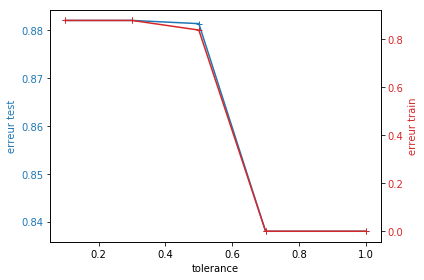

In [20]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tolerance')
ax1.set_ylabel('erreur test', color=color)
ax1.plot([0.1, 0.3, 0.5, 0.7, 1],erreur_c,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('erreur train', color=color)
ax2.plot([0.1, 0.3, 0.5, 0.7, 1],train_erreur_c,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

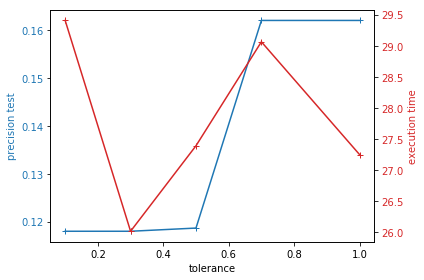

In [21]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tolerance')
ax1.set_ylabel('precision test', color=color)
ax1.plot([0.1, 0.3, 0.5, 0.7, 1],precisions_c,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot([0.1, 0.3, 0.5, 0.7, 1],temps_c,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

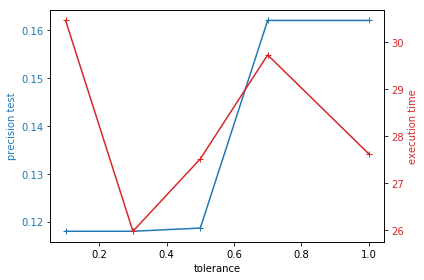

In [22]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tolerance')
ax1.set_ylabel('precision test', color=color)
ax1.plot([0.1, 0.3, 0.5, 0.7, 1],precisions_c,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot([0.1, 0.3, 0.5, 0.7, 1],tt_c,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

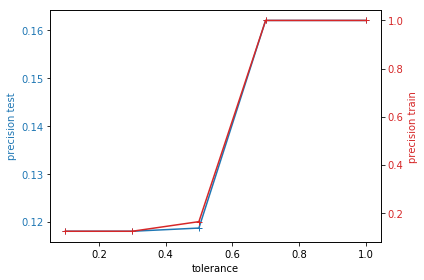

In [23]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tolerance')
ax1.set_ylabel('precision test', color=color)
ax1.plot([0.1, 0.3, 0.5, 0.7, 1],precisions_c,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('precision train', color=color)
ax2.plot([0.1, 0.3, 0.5, 0.7, 1],train_precisions_c,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

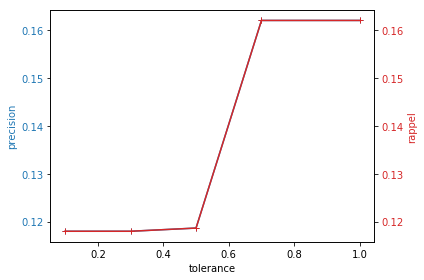

In [24]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tolerance')
ax1.set_ylabel('precision', color=color)
ax1.plot([0.1, 0.3, 0.5, 0.7, 1],precisions_c,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('rappel', color=color)
ax2.plot([0.1, 0.3, 0.5, 0.7, 1],rappel_c,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

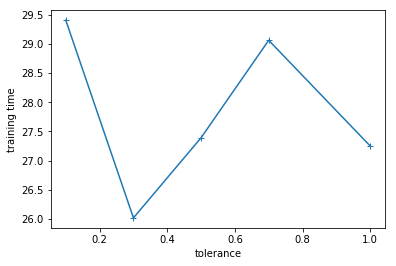

In [25]:
plt.plot([0.1, 0.3, 0.5, 0.7, 1],temps_c,'+-')
plt.ylabel('training time')
plt.xlabel('tolerance')
plt.show()

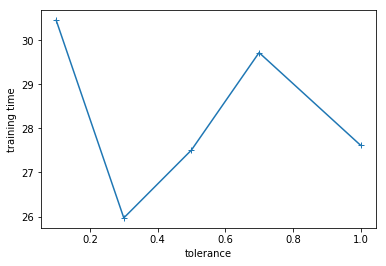

In [26]:
plt.plot([0.1, 0.3, 0.5, 0.7, 1],tt_c,'+-')
plt.ylabel('training time')
plt.xlabel('tolerance')
plt.show()

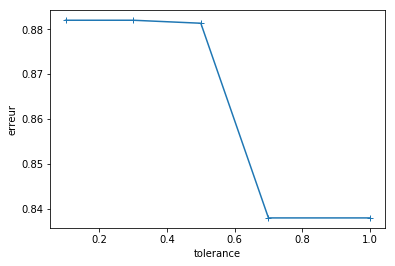

In [27]:
plt.plot([0.1, 0.3, 0.5, 0.7, 1],erreur_c,'+-')
plt.ylabel('erreur')
plt.xlabel('tolerance')
plt.show()